# Explanatory Visualizations

- We only saw exploritory analysis, where we are using viz to see insights

- we are now focusing on explanatory analysis

    - polished, easy to obtain insight
    
    - when we are away, they still need to be able to understand it
    
- Goal:

    - Taking insights from exploration and creating explanatory analysis
    
    - We have a broader audience here, so we need to be able to convey our findings to other people who don't have the level of hands on experience with the data as you
    
- Focus:

    - to tell a specific story that I want to convey to a particular audience
    
- We will typically take our plots from exploratory phase and polish them off to highlight specific insights

    - we may change our insights for different audiences
    
- We want our plots to be informative to us and compelling and understandable to others

## Telling a data story

- Stories have power of captivating, it can't compete with facts

- When we present our findings, we must be sure to tell a story

- Process

    - start with a compelling question
    
        - if I am doing an entire presentation, supplement it with engaging visuals
        
   - repetition of the problem is a good thing
   
       - continue to motivate question with additional examples or deeper questions
       
       - purpose: keep audience engaged and understand the context of my question
       
       - it can be simple and clearly explicit
       
       - visuals and audio queues will help bring question to long term memory
       
   - Highlight the answer
   
       - this is so that no one can miss it
       
   - conclude with call to action for audience
   
       - data by itself doesn't move people to take action
   
       - I want to motivate the action, with data ony assisting in my conclusion
       
       - I need to provide context of audience next steps
       
   

## Polishing Plots

- Explanatory viz are primarily for conveying message or story

- It should grab readers attention and create a feeling/ call to action

- We need to polish our plots to accomplish this

- Appropriate plot type and ecodings, good design integrity

- context information

    - labeled axis, reasonable tick marks
    
    - descriptive legends and title
    
    - accompamying comments and text
    
- All of this is to make sure our reader knows what we are telling them



### Polishing off with matplotlib and seaborn

- Recall:

    - each viz is based off a single figure
    
    - contains one or more axes
    
    - each axes has elements like points, lines, boxes, that depict plotted data
    
- If we understand this structure and make use of it we will oopen up our abillity to polish plots

![](useful_arc_matplotlib.png)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

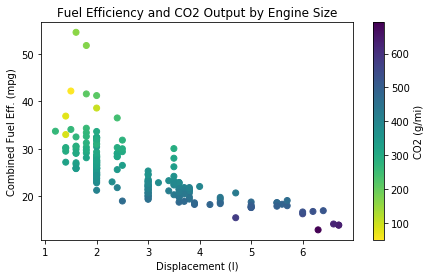

In [17]:

fuel_econ = pd.read_csv('fuel_economy.csv')

np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

# plotting the data
plt.figure(figsize = [7,4])
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2',
            cmap = 'viridis_r')
plt.title('Fuel Efficiency and CO2 Output by Engine Size')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');


In [18]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [19]:
# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

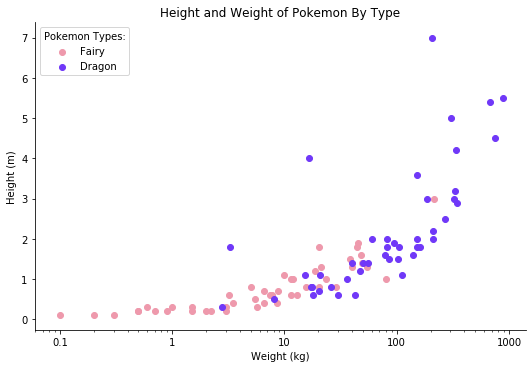

In [54]:
type_colors = {"dragon": "#7038f8", "fairy": "#ee99ac"}
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5,
                 aspect=1.5, palette=type_colors)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')
x_ticks = [10 ** -1, 10 ** 0, 10 ** 1, 10 ** 2, 10 ** 3]
x_labels = [str(x_loc) for x_loc in x_ticks]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)");
plt.title("Height and Weight of Pokemon By Type");
plt.legend(title="Pokemon Types:", loc="upper left",
          labels=["Fairy", "Dragon"]);

## Getting and using Feedback

- When we create a report or presentation to communicate results to others, even if we follow plot choice and guidelines, it still is hard to see if we have effective visualization

- If we aren't sure if what we are trying to tell is being conveyed  We can use feedback from others to guide designs (anybody, not someone who necessarily has experiene)

- First let them go through it themselves

- Ask them

    - what was the main point of thee visualization
    
    - do you have any question
    
    - is their anything you don't understand in the viz
    
- This can help us see things that we missed

- Some follow up questions:

    - What do you notice about each visualization?
    
    - What questions do you have about the data?
    
    - What relationships do you notice?
    
    - What do you think is the main takeaway from the report / presentation?
    
    - Is there anything that you don’t understand from the plots?